In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)   


In [ ]:
dataset = Dataset_UNSW_NB15(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.k_run(min_k=100, max_k=3000, dif=100, n_fi=10, n_pca=100)

/Users/ham/codes/IDS_IoT/dataset_UNSW_NB15_1.py:126: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.DATA_FILE_PATH)


Invalid dsport: 4
max_feature: 159


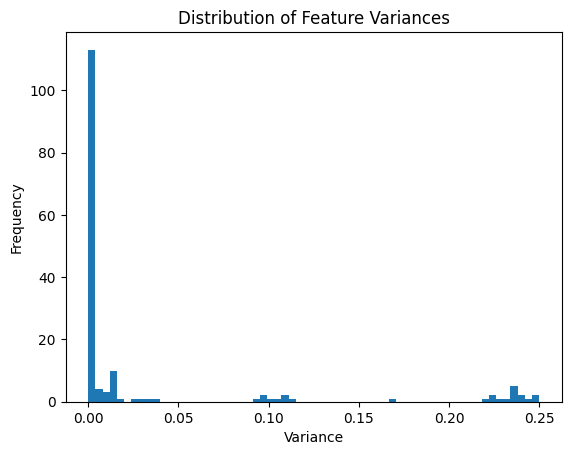

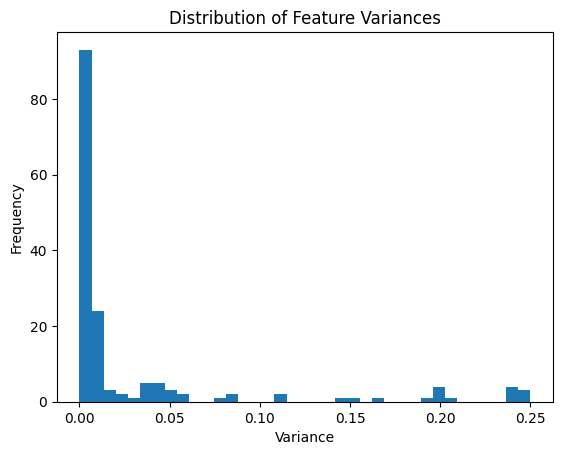

Fit time: 23.9607
Evaluate time: 0.4139
Accuracy: 0.2345
F1: 0.0892


In [2]:
dataset = Dataset_UNSW_NB15_1(100000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run(k=100000, n_fi=20, n_pca=70)
#exp.grid_run(k=100000, dif=10)

In [ ]:
dataset = Dataset_NSL_KDD(100000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
#exp.run(k=100000, n_fi=10, n_pca=70)
#exp.k_run(min_k=100, max_k=1000, dif=100, n_fi=10, n_pca=100)
exp.grid_run(k=100000, dif=10)
#exp.n_fi_run(k=1200, dif=10)

In [ ]:
dataset = Dataset_IoT_NID(100000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
#exp.run(k=2000, n_fi=20, n_pca=80)
exp.grid_run(k=100000, dif=10)
#exp.k_run(min_k=100, max_k=3000, dif=100, n_fi=10, n_pca=100)